# The Bias-Variance Tradeoff & Train-Test-Split
Authors: Heather Robbins

---


## Learning Objectives

- Describe error due to bias and error due to variance.
- Explain the difference between bias and variance and understand the tradeoff between the two.
- Understand what it means for a model to be underfit and to be overfit.
- Diagnose error due to bias and variance in models.
- Understand how to use train-test-split

---
## How do we quantify error?

Whenever we're fitting models, we're going to run into problems.  Usually we run into problems related to **high bias**, or **high variance**.  In other words, we're talking about an **underfitting** or **overfitting** problem.  It's likely that you have a problem that entails something along the spectrum of **bias** and **variance** that could inform some strategy to improve our model(s) performance.

## Bias
- Underfitting
- How bad your model is at predicting $y$

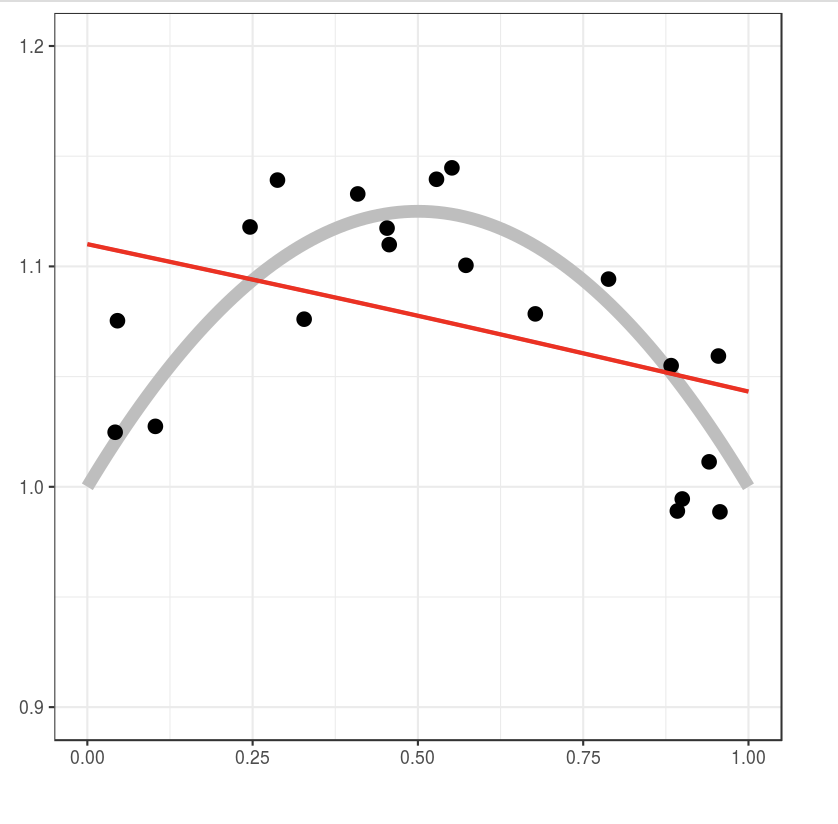

## Variance

- Overfitting
- How bad your model is at generalizing to new data

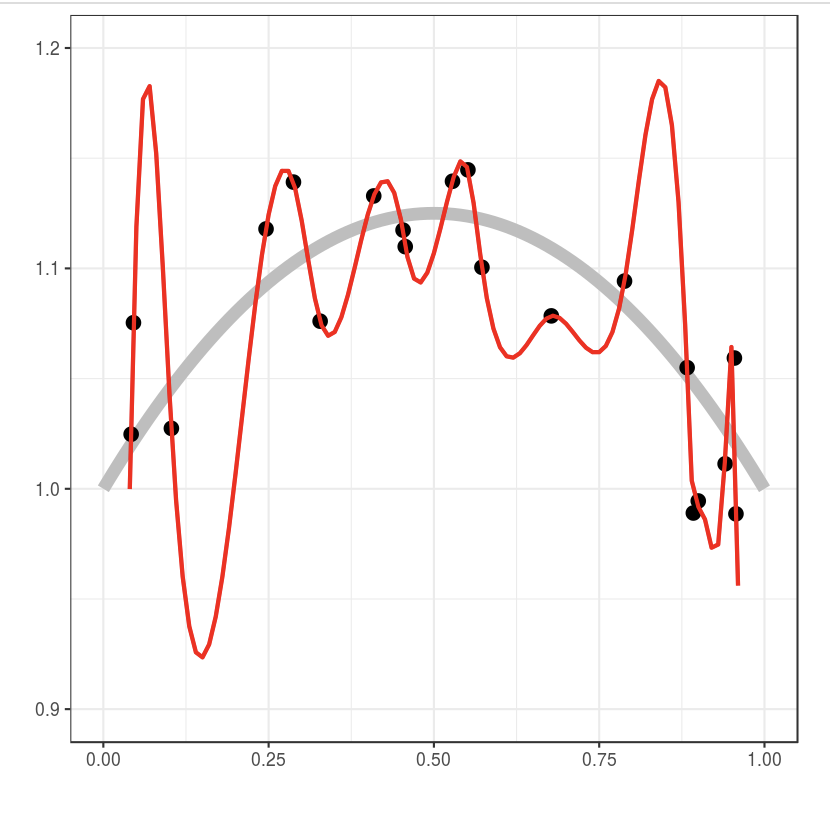

### Cliffsnotes:

> **Bias** is how bad your model is at predicting $y$.

> **Variance** is how bad your model is at generalizing to new data.

Understanding the bias-variance tradeoff is important, because it helps you intuitively reason about how different models or metrics may affect your results.

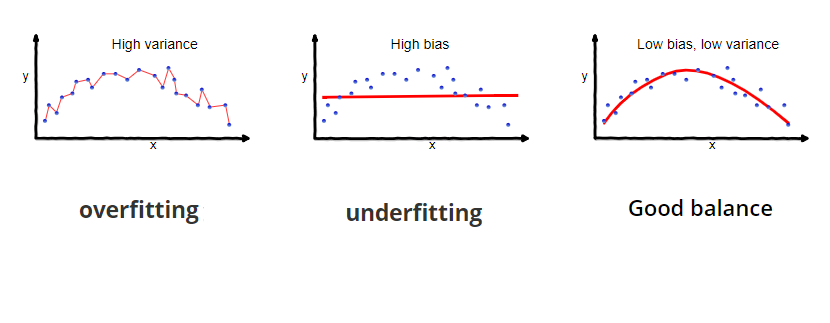

## Why Does Bias Occur?

Basically, more bias points us to believe our model is too simple.

- On average, our model $\hat{y}$ is going to be far from the truth $y$.
- For example, I tried to model a curved relationship with a straight line.
- When we rely on simplifying assumptions that aren’t valid (i.e. linearity), we can run into high bias.
 - Linear regression is an method where we might suffer from high bias.

## Why Does Variance Occur?

Basically, more variance points us to believe our model is too complex.

- Our model $\hat{y}$ matches our data too closely.
- We may not have enough data.
- Our model may "fit" very well to data it's seen, but not generalize well to data it hasn't.

### Suppose we want to build a model to best predict $y$ using $X$.

#### Bias:  The average difference between our model $\hat{y}$ and the truth $y$.

- No bias: On average, our predictions are correct.
- High bias: Low accuracy -> underfit
- As bias increases, our predictions, on average, get more and more incorrect.

#### Variance: The amount of variation in our model.

- No variance: Our predictions consistently hit the same value.
- High variance: high accuracy -> overfit
- As variance increases, our predictions get more and more spread out.

---

### Example: Linear Regression
    
We often refer to linear regression as a model with _low variance_ and _high bias_. For example:

$$\hat{y} = \beta_0 + \beta_1x.$$


When trained on different subsets of the population, we observe that its estimated parameters typically have:

- **High bias**: Linear regression tends to _underfit_, since data is rarely linear.
- **Low variance**: A similar line is always fit.

For this reason, we often see an underfit -- the model is not complex enough to model the signal. 

<details><summary>QUESTION: How can we tell if a model is underfitting?</summary>
We know it is underfitting by observing a large training and test error.
</details>

---

## Importing libraries

---

We'll need the following libraries for today's lesson:
- `pandas`
- `numpy`
- `seaborn`
- `matplotlib.pyplot`
- we'll need a `LinearRegression` from `sklearn.linear_model`
- from `sklearn.model_selection` we'll need `train_test_split`

In [2]:
#imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<a id='demo'></a>

## Load the Data

Load in `colleges.csv`

In [3]:
df = pd.read_csv('data/colleges.csv')

In [4]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### We will be trying to predict the 'Apps' column (number of received applications) based on other columns of data in the dataset

## Basic Data Checks
---

Check the following in the cells below:
1. Do we have any null values?
2. Do we have all numerical columns?

In [5]:
# Check for nulls

df.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:
# Check column data types

df.dtypes

Private          int64
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

## EDA: Plot a Heatmap of the Correlation Matrix
---

Heatmaps are an effective way to visually examine the correlational structure of your predictors. 

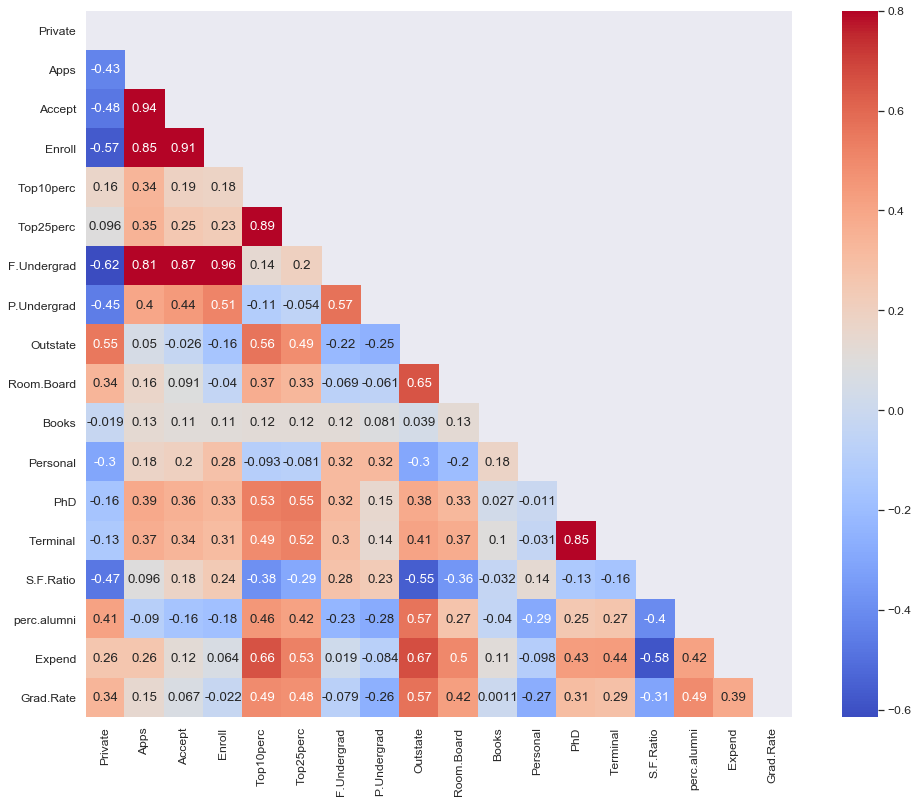

In [11]:
sns.set(font_scale = 1.1)
f, ax = plt.subplots(figsize=(18, 13))
corr = df.corr() 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask,  vmax=.8, square=True, cmap='coolwarm',annot= True)

<a id='x-y'></a>

## High Bias Model:

### Create our features matrix (`X`) and target vector (`y`)
---

The following columns will be our features:
- `Expend`
- `Terminal`

The `Apps` column is what we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [12]:
X = df[['Expend', 'Terminal']]
y = df['Apps']

### Instantiate Model

In [13]:
lr_bias = LinearRegression()

### Train-Test-Split

The most basic type of "hold-out" validation is called **train/test split**. We split our data into two pieces:

> **"A Training Set":** The subset of the data on which we fit our model.

> **"A Testing Set":** The subset of the data on which we evaluate the quality of our predictions.


**Train/Test Split Benefits:**

- Testing data can represent "future" data; for prediction-oriented models, it's critical to ensure that a model that is performing well on current data will likely perform well on future data.
- It can help diagnose and avoid overfitting via model tuning.
- It can improve the quality of our predictions.

**Visual representation of Train-Test Split**:  
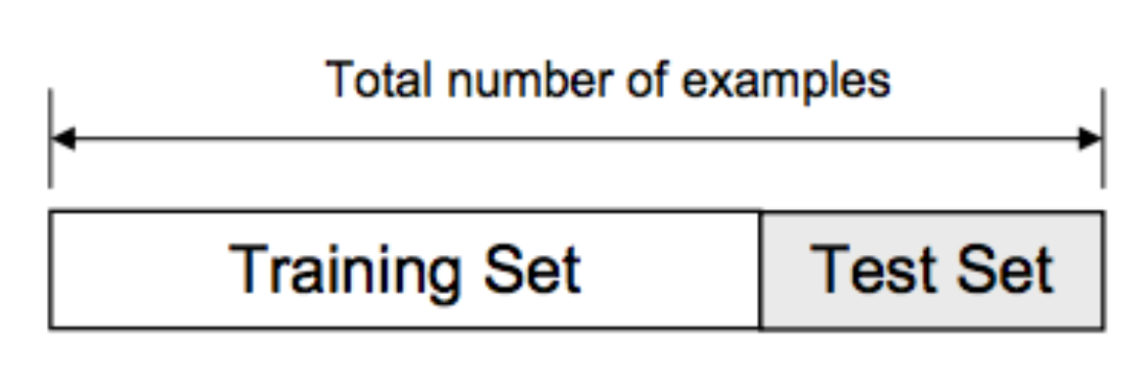

#### Split our data into training and testing sets:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [16]:
X_train.shape, X_test.shape

((660, 2), (117, 2))

In [17]:
y_train.shape, y_test.shape

((660,), (117,))

#### Fit our model

In [18]:
lr_bias.fit(X_train, y_train)

LinearRegression()

#### Score our model (we'll use Sklearn's default scoring metric, `R2`)

In [19]:
lr_bias.score(X_train, y_train), lr_bias.score(X_test, y_test)

(0.1403179203551792, 0.20260499266558152)

### What does this tell us??

The `R2 score` for the training data is telling us that even on data it has already seen, it is only able to explain 14.5% of the variability in the number of applications a college receives.

On data it hasn't seen, the testing data, it is able to to explain 16.4% of variablility in the number of college applications received.

These scores are quite low, but they are consistent. This tells us that we have a **High Bias** and **Low Variance model**.

It is **High Bias (underfit)** because it is far too simplistic. It cannot pick up on patterns in the data to make accurate predictions. It's also **Low Variance** because it is consistently creating that same line/predicting similar numbers.

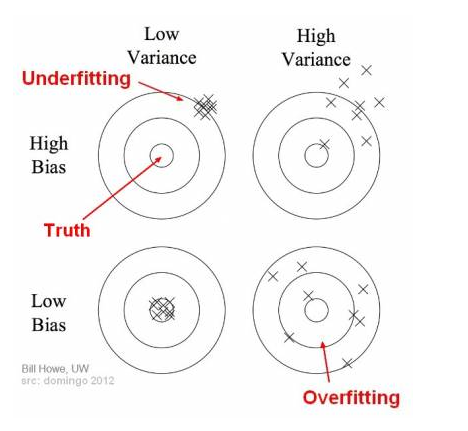

### How Can We Reduce the High Bias?**
According to the bias-variance tradeoff, to reduce the bias (and make the fit better), we must increase the model variance (and make it more sensitive to noise).

#### Approach: Increase Variance by Adding More Parameters
Adding more parameters increases the "model complexity" -- and hence allows it more flexibility to fit the data (i.e. a lower bias).

For example, we could make it a higher-order polynomial model:

$$\hat{y} = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3.$$

Or we could add additional features:

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3.$$


<details><summary>QUESTION: How does adding new parameters affect the bias and variance?</summary>
    
- **Increased variance**: There are now more ways to fit the model. 
- **Decreased bias**: More ways to fit the model means it can fit better.

</details>
---

## Let's load up on features, then!

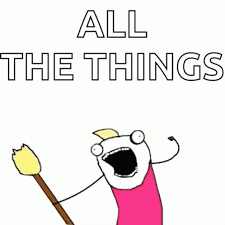

### Create `X` and `y` where `X` contains all columns EXCEPT for the `Apps` column

In [20]:
X = df.drop(columns = ['Apps', 'Accept', 'Enroll'])
y = df['Apps']

In [22]:
X.shape

(777, 15)

### Instantiate another Linear Regression

In [21]:
variance = LinearRegression()

### Make more features:

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly = PolynomialFeatures(include_bias = False)

X_poly = poly.fit_transform(X)

In [25]:
X_poly.shape

(777, 135)

### Set up the train-test-split using:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 1)

In [27]:
variance.fit(X_train, y_train)

LinearRegression()

In [28]:
variance.score(X_train, y_train), variance.score(X_test, y_test)

(0.8746589125303339, 0.5953424643547375)

### What does this tell us??

The `R2 score` for the training data is telling us that it does really well on data it has already seen. It's able to explain 98.3% of variability in the number of college applications received. 

This sounds really good, but look at the testing score, the data it has not seen. It is only able to explain 50.7% of variability in the number of college application received. 

There's a huge difference between these two! The model does really well on the training data, but does not generalize well to unseen data. The model is **Overfit**.

The model is **High Variance** because it is overly complex. There are too many features in the model. So instead of picking up on the the true patterns in the data it is picking up on noise.


### How do we handle High Variance?
   
- We reduce the number of features!
- We do exploratory data analysis to determine which features have strong relationships with the target variable.
    - Look at correlation heatmaps and distributions of your data
        - **this will help weed out some of the 'noise' in the data that is causing the variance**.
    - There are other more efficient/effective ways to handle having too many features that we'll learning about shortly.

## Let's find the one that's juuuuuusssssst right:
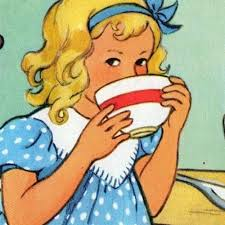

In [29]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Set up X with all columns except for `Apps`, `perc.alumni` and `S.F.Ratio`, `Accept`, `Enroll`

In [35]:
X = df.drop(columns = ['Apps', 'perc.alumni', 'S.F.Ratio'])
y = df['Apps']

#### Instantiate model

In [36]:
goldilocks = LinearRegression()

#### Train-test-split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

#### Fit the model

In [38]:
goldilocks.fit(X_train, y_train)

LinearRegression()

#### Score the model:

In [39]:
goldilocks.score(X_train, y_train), goldilocks.score(X_test, y_test)

(0.9225410252754106, 0.9503026693631711)

<img src="https://media4.giphy.com/media/5VKbvrjxpVJCM/giphy.gif?cid=ecf05e4739r5ss545tex1riitgiozsui0sv1q37j0m8kojdz&rid=giphy.gif" style="float: center; margin: 10px; height: 200px">

### Now what does this one tell us?

- This model is doing well on both the training and the testing data! 
- There is **low bias** and **low variance**. We know this because the training and test scores are high and they are relatively close. 

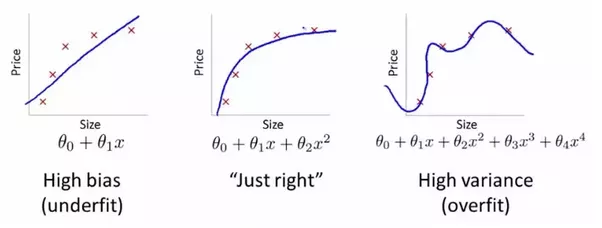

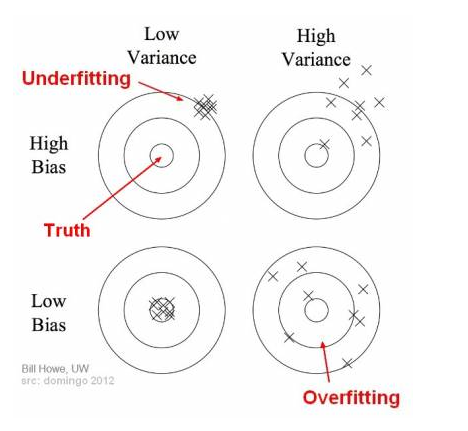

## Interview Question #1


<details><summary>What are the three types of error in a Machine Learning model? Briefly describe them.
</summary>
    
1. Bias - error caused by choosing an algorithm that does a poor job at modeling the signal in the data, i.e. the model is bad. For example, using linear regression to model highly non-linear data would result in error due to bias.
2. Variance - error caused by a model not generalizing well to new data, or being overfit to the training data.
3. Irreducible error - error caused by noise in the data that cannot be removed through modeling.
    
</details>

## Interview Question #2

<details><summary>What is the bias-variance trade-off?
</summary>
    
Bias occurs when your model is to simple and is not picking up on the complexities in the dataset (underfit). Variance occurs when your model is too complex and is modeling too much noise in the data, therefore not generalizing well to new data (overfit). The bias-variance trade off is the trade off between underfitting and overfitting. The goal of building a good machine learning model should be a balance between bias and variance: good enough to get accurate predictions but general enough to perform well on unseen data.
    
</details>